In [1]:
#Import libraries
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#unzip folder and create dict

with zipfile.ZipFile('Kickstarter+Projects.zip') as folder:
    dfs = {text_file.filename: pd.read_csv(folder.open(text_file.filename)) for text_file in folder.infolist() if text_file.filename.endswith('.csv')}

In [3]:
#get data from dict into dataframe

ks_data = pd.DataFrame.from_dict(dfs['kickstarter_projects.csv'])


# My Functions

In [4]:
#get portion of data
def df_head(dataframe):
    if not dataframe.head().empty:
        return dataframe.head()
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#get information
def df_info(dataframe):
    if not dataframe.empty:
        return dataframe.info() 
    else:
        return "There is an issue with your dataframe! Check your dataframe variable."

#get shape
def df_shape(dataframe):
    if dataframe.shape == (0,0):
        return "Your dataframe does not exist! Check your dataframe variable."
    else:
        return dataframe.shape

#decribe dataframe
def describe_df(dataframe):
    if not dataframe.empty:
        return dataframe.describe()
    else:
        return "Your dataframe does not exist! Check your dataframe variable."


#get columns
def get_columns(dataframe):
    list_length = len(dataframe.columns)
    if list_length >= 0:
        return dataframe.columns
    else:
        return "There are no columns in your dataframe! Check your dataframe variable."

#get column data
def column_data(dataframe, column_name: str):
    if column_name in get_columns(dataframe):
        return dataframe[column_name]
    else:
        return "Your dataframe or column does not exist! Check your dataframe variable and columns."

#check nulls
def check_nulls(dataframe):
    num_nulls = dataframe.isnull().sum()
    percent_nulls = num_nulls / len(dataframe) * 100
    if not dataframe.empty:
        if num_nulls.sum() > 0:
            return f"Here are the number of null values per column:\n {num_nulls}\nHere are the frequency of null values per column:\n {percent_nulls}"
        else:
            return "There are no nulls in your data."
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#check value counts
def unique(dataframe):
    if not dataframe.empty:
        return f"Here are the number of unique values per columns:", dataframe.nunique()


#check for dups
def check_dups(dataframe):
    num_dups = dataframe.duplicated().sum()
    if not dataframe.empty:
        return f"There are {num_dups} duplicates in your dataframe"
    else:
        return "Your dataframe does not exist! Check your dataframe variable."
    
#drop dups
def drop_dups(dataframe):
    dataframe = dataframe.drop_duplicates()
    if check_dups(dataframe) == 0:
        return dataframe
    else:
        return "There are still duplicates in your data. Please check your code."


#Visuals 

def make_hist(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].hist(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j + 1])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make boxplots
def make_boxplot(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].boxplot(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j + 1])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make pairplot
def make_pairplot(dataframe):
    return sns.pairplot(dataframe)

#make heatmap
def make_heatmap(dataframe):
    correlation = dataframe.corr
    return sns.heatmap(correlation)

#make scatter plot
def make_scatter(dataframe, x_column, y_column, title: str, x_label: str, y_label: str):
    plt.scatter(x=dataframe[x_column], y=dataframe[y_column])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

# EDA

In [5]:
#make copy of raw data
data_copy = ks_data.copy()

In [6]:
#check shape
df_shape(data_copy)

(374853, 11)

approx 375k rows adn 11 features; will have to downsize eventually

In [7]:
df_info(data_copy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


ID could be object, launched and deadline are objects and will need to be converted

In [9]:
df_head(data_copy)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [10]:
describe_df(data_copy)

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [11]:
check_dups(data_copy)

'There are 0 duplicates in your dataframe'

In [14]:
check_nulls(data_copy)

'There are no nulls in your data.'

In [63]:
unique(data_copy)

('Here are the number of unique values per columns:',
 ID             374853
 Name           372061
 Category           15
 Subcategory       159
 Country            22
 Launched         3168
 Deadline         3164
 Goal            27692
 Pledged         39989
 Backers          3963
 State               5
 dtype: int64)

There are 15 categories, 159 sub categories, 22 countries, and 5 states

In [16]:
#change ID to string
data_copy['ID'] = data_copy['ID'].astype(str)

In [56]:
#change dates from strings and keep only year, month, day

data_copy['Launched'] = pd.to_datetime(data_copy['Launched']).dt.date

#change to datetime again
data_copy['Launched'] = pd.to_datetime(data_copy['Launched'])

data_copy['Deadline'] = pd.to_datetime(data_copy['Deadline'])



In [27]:
df_info(data_copy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  object        
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 31.5+ MB


In [28]:
df_head(data_copy)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed


In [57]:
#remove some columns now - ID, Name because irrelevent

data_copy = data_copy.drop(['ID', 'Name'], axis=1)

In [66]:
df_head(data_copy)

,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed


In [26]:
describe_df(data_copy)

,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,374853.000000
mean,4.586378e+04,9.121073e+03,106.690359
std,1.158778e+06,9.132054e+04,911.718520
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,3.100000e+01,2.000000
50%,5.500000e+03,6.250000e+02,12.000000
75%,1.600000e+04,4.051000e+03,57.000000
max,1.663614e+08,2.033899e+07,219382.000000


In [81]:
#describe categorical data

data_copy.describe(include='O')

,Category,Subcategory,Country,State
count,374853,374853,374853,374853
unique,15,159,22,5
top,Film & Video,Product Design,United States,Failed
freq,62694,22310,292618,197611


Text(0, 0.5, 'Campaign Count')

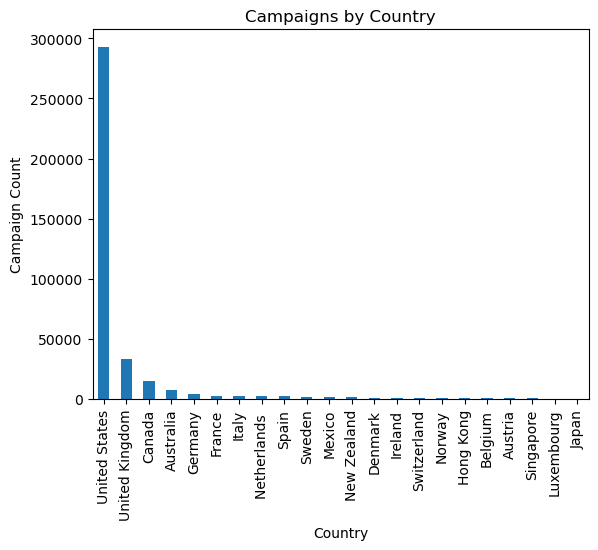

In [78]:
#count of campaigns by country

country_counts = data_copy['Country'].value_counts()
country_graph = country_counts.plot.bar()
country_graph.set_title('Campaigns by Country')
country_graph.set_xlabel('Country')
country_graph.set_ylabel('Campaign Count')

The US accounts for a lot of campaigns

Text(0, 0.5, 'Category Count')

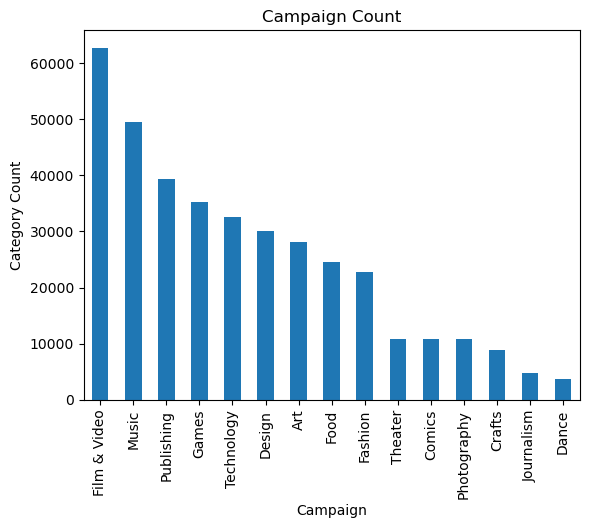

In [79]:
#count campaigns by categroy

campaigns = data_copy['Category'].value_counts()
campaigns_graph = campaigns.plot.bar()
campaigns_graph.set_title('Campaign Count')
campaigns_graph.set_xlabel('Campaign')
campaigns_graph.set_ylabel('Category Count')

Text(0, 0.5, 'State Count')

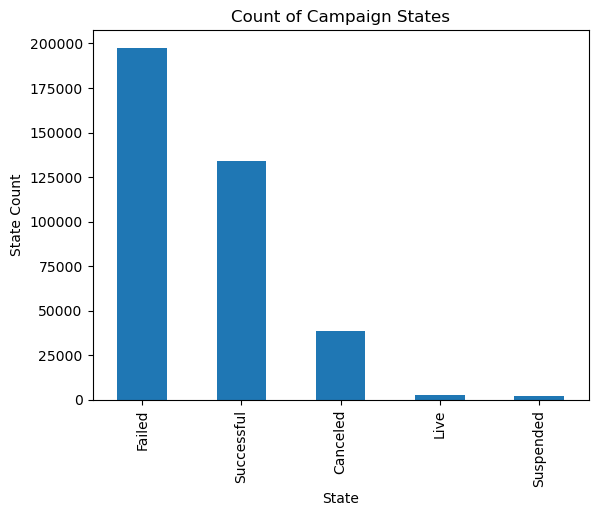

In [80]:
# count of campaign states

states = data_copy['State'].value_counts()
states_graph = states.plot.bar()
states_graph.set_title('Count of Campaign States')
states_graph.set_xlabel('State')
states_graph.set_ylabel('State Count')


I am only interested in Failed and Successful so I will remove Canceled, Live, and Suspended

In [70]:
#make df with only Failed and Successful

working_df = data_copy[(data_copy['State'] == 'Failed') | (data_copy['State'] == 'Successful')]

df_head(working_df)

,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed


Let's do some exploration of the new df

In [78]:
df_shape(working_df)

(331462, 9)

Text(0, 0.5, 'Campaign Count')

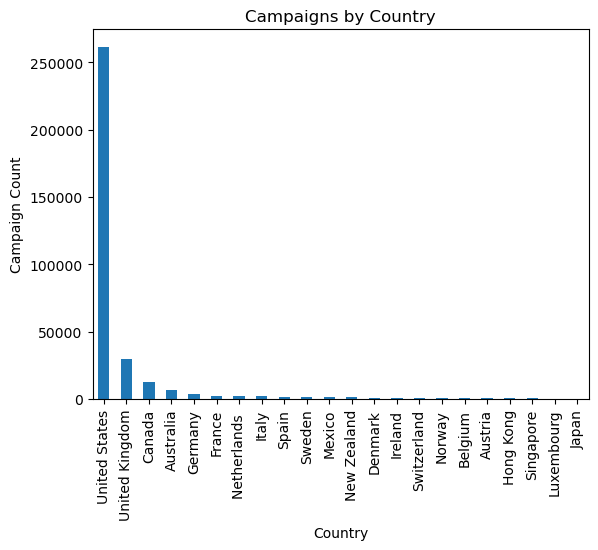

In [79]:
#count of campaigns by country

country_counts = working_df['Country'].value_counts()
country_graph = country_counts.plot.bar()
country_graph.set_title('Campaigns by Country')
country_graph.set_xlabel('Country')
country_graph.set_ylabel('Campaign Count')

Text(0, 0.5, 'Category Count')

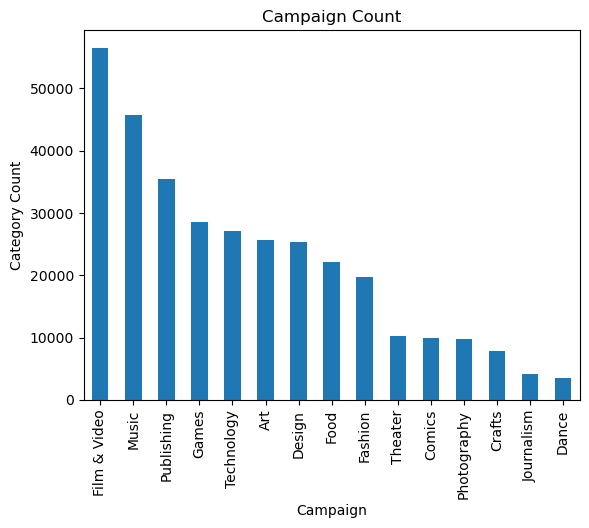

In [80]:
#count of campaigns by category

campaigns = working_df['Category'].value_counts()
campaigns_graph = campaigns.plot.bar()
campaigns_graph.set_title('Campaign Count')
campaigns_graph.set_xlabel('Campaign')
campaigns_graph.set_ylabel('Category Count')

not much change if at all for countries and categories

In [81]:
describe_df(working_df)

,Goal,Pledged,Backers
count,3.314620e+05,3.314620e+05,331462.000000
mean,4.152286e+04,9.939993e+03,116.456315
std,1.109279e+06,9.664561e+04,965.732911
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,5.000000e+01,2.000000
50%,5.000000e+03,7.880000e+02,15.000000
75%,1.500000e+04,4.609000e+03,63.000000
max,1.663614e+08,2.033899e+07,219382.000000


(array([3.31372e+05, 3.70000e+01, 7.00000e+00, 1.50000e+01, 5.00000e+00,
        2.00000e+00, 2.20000e+01, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([0.00000000e+00, 1.66361391e+07, 3.32722782e+07, 4.99084173e+07,
        6.65445564e+07, 8.31806955e+07, 9.98168346e+07, 1.16452974e+08,
        1.33089113e+08, 1.49725252e+08, 1.66361391e+08]),
 <BarContainer object of 10 artists>)

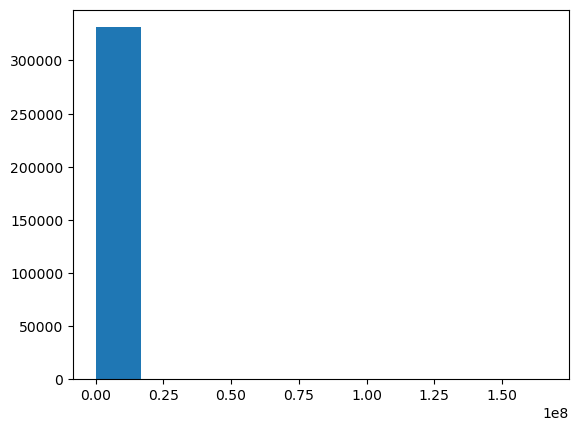

In [82]:
plt.hist(working_df['Goal'])

(array([3.31394e+05, 4.40000e+01, 9.00000e+00, 1.10000e+01, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0. ,  21938.2,  43876.4,  65814.6,  87752.8, 109691. ,
        131629.2, 153567.4, 175505.6, 197443.8, 219382. ]),
 <BarContainer object of 10 artists>)

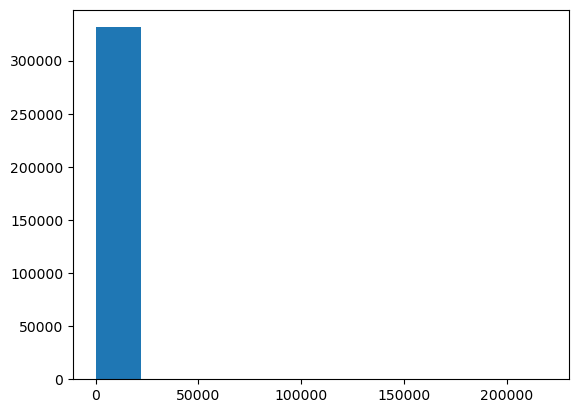

In [83]:
plt.hist(working_df['Backers'])

(array([3.31369e+05, 6.50000e+01, 1.50000e+01, 5.00000e+00, 3.00000e+00,
        1.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([       0. ,  2033898.6,  4067797.2,  6101695.8,  8135594.4,
        10169493. , 12203391.6, 14237290.2, 16271188.8, 18305087.4,
        20338986. ]),
 <BarContainer object of 10 artists>)

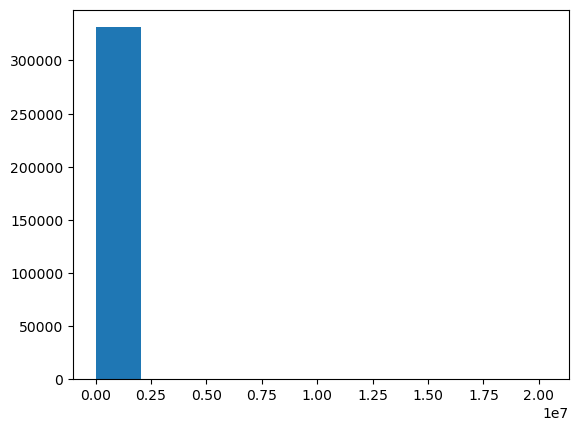

In [84]:
plt.hist(working_df['Pledged'])

Still quite a range on the data so will transform with log, but since there are 0, will replace those 0's with one first

In [71]:
#replace 0 with one for log transformation

working_df.loc[:, ['Goal', 'Pledged', 'Backers']] = working_df.loc[:, ['Goal', 'Pledged', 'Backers']].replace(0,1)

#working_df[:, 'Goal'] = working_df['Goal'].replace(0,1)
#working_df[:, 'Pledged'] = working_df['Pledged'].replace(0,1)
#working_df[:, 'Backers'] = working_df['Backers'].replace(0,1)

#generate histogram
def histogram(dataframe, column):
    if not dataframe.empty:
        plt.hist(dataframe[column])
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        return "Your dataframe does not exist. Check your dataframe variable"


/tmp/ipykernel_815/2559683568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df.loc[:, ['Goal', 'Pledged', 'Backers']] = working_df.loc[:, ['Goal', 'Pledged', 'Backers']].replace(0,1)


In [72]:
#transform those columsn with log

working_df[['Goal', 'Pledged', 'Backers']] = np.log(working_df[['Goal', 'Pledged', 'Backers']]) 

/tmp/ipykernel_815/4059180700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df[['Goal', 'Pledged', 'Backers']] = np.log(working_df[['Goal', 'Pledged', 'Backers']])


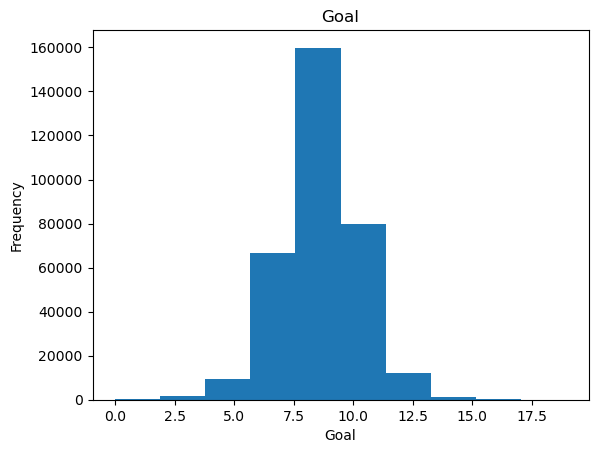

In [9]:
histogram(working_df, 'Goal')

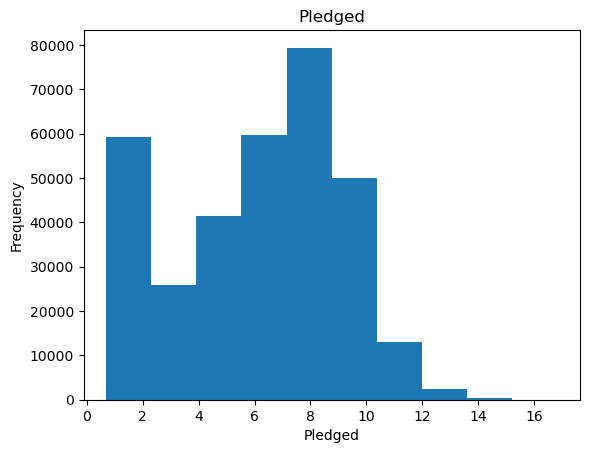

In [115]:
histogram(working_df, 'Pledged')

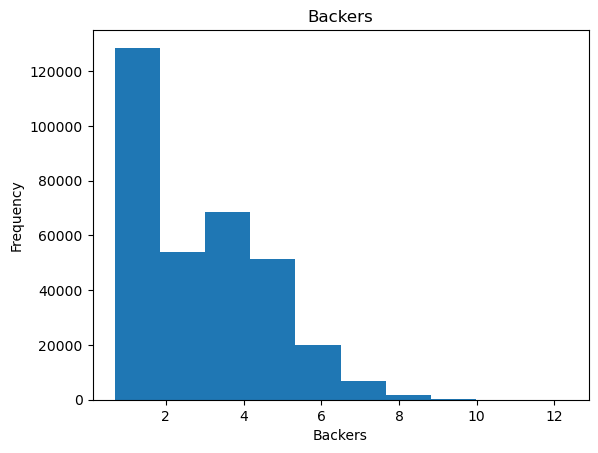

In [116]:
histogram(working_df, 'Backers')

histograms appear a bit better as opposed to a single bar

In [11]:
#make boxplots
def boxplots(dataframe, column):
    if not dataframe.empty:
        plt.boxplot(dataframe[column])
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        return 'Your dataframe does not exist. Check your dataframe variable'

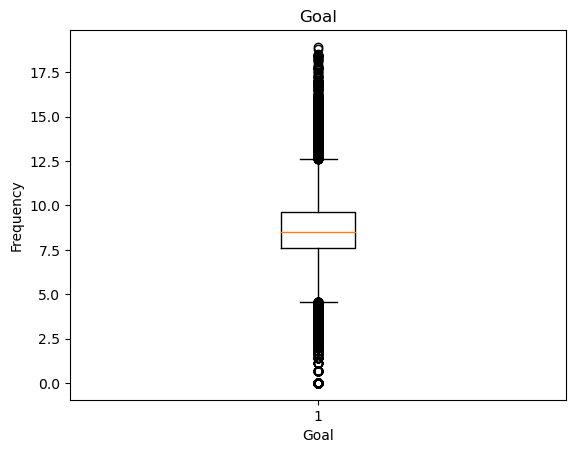

In [12]:
boxplots(working_df, 'Goal')

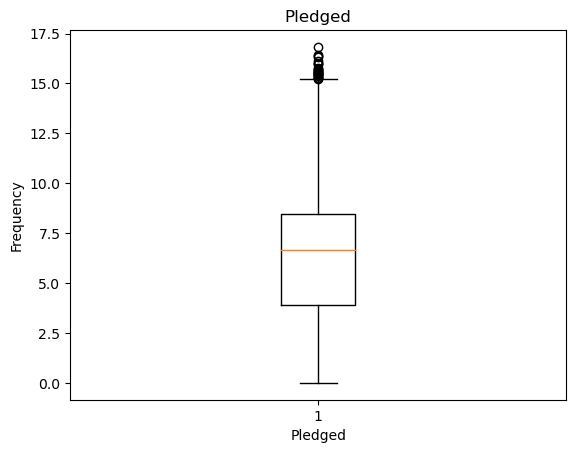

In [14]:
boxplots(working_df, 'Pledged')

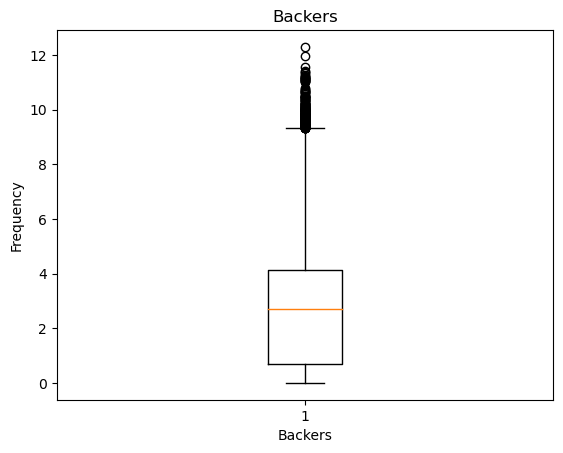

In [15]:
boxplots(working_df, 'Backers')

Lots of outliers - check to see how many, if low can remove

In [63]:
df_info(working_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 374605
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Category     331462 non-null  object        
 1   Subcategory  331462 non-null  object        
 2   Country      331462 non-null  object        
 3   Launched     331462 non-null  datetime64[ns]
 4   Deadline     331462 non-null  datetime64[ns]
 5   Goal         331462 non-null  float64       
 6   Pledged      331462 non-null  float64       
 7   Backers      331462 non-null  float64       
 8   State        331462 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 25.3+ MB


In [66]:
# Calculate the IQR of select column the integers
my_columns = ['Goal', 'Pledged', 'Backers']

Q1 = working_df[my_columns].quantile(0.25)
Q3 = working_df[my_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the range of normal values
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

# Count the number of outliers in each column
my_outliers = ((working_df[my_columns] < lower_range) | (working_df[my_columns] > upper_range))
num_outliers = my_outliers.sum()
outlier_freq = num_outliers / len(working_df) * 100

print(num_outliers, "\n", outlier_freq)

Goal       6636
Pledged      28
Backers     208
dtype: int64 
 Goal       2.002039
Pledged    0.008447
Backers    0.062752
dtype: float64


Given outliers are only a small percentage of the dataset, it will be easiest to drop them. It shouldn't impact the overall data too much

In [73]:
#remove outliers
working_df = working_df[~my_outliers.any(axis=1)]

In [74]:
df_info(working_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324674 entries, 0 to 374605
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Category     324674 non-null  object        
 1   Subcategory  324674 non-null  object        
 2   Country      324674 non-null  object        
 3   Launched     324674 non-null  datetime64[ns]
 4   Deadline     324674 non-null  datetime64[ns]
 5   Goal         324674 non-null  float64       
 6   Pledged      324674 non-null  float64       
 7   Backers      324674 non-null  float64       
 8   State        324674 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 24.8+ MB


In [75]:
#calc data lost

len_original = len(data_copy)
len_new = len(working_df)

loss = (len_new - len_original) / len_original*100

print(f"The original dataframe length was {len_original} rows, removing outliers resulted in a dataframe of {len_new} rows. This is a {loss} percent change")

The original dataframe length was 374853 rows, removing outliers resulted in a dataframe of 324674 rows. This is a -13.38631410179457 percent change


Still have quite a bit of data in after condensing to Failed and Successful and removing outliers.

Let's review the histograms and box plots for Goal, Pledged, and Backers

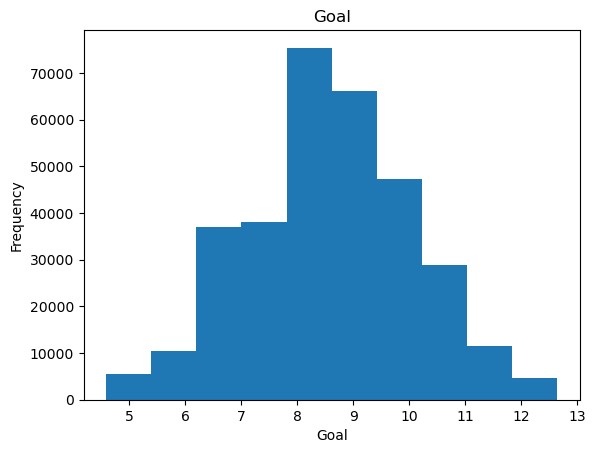

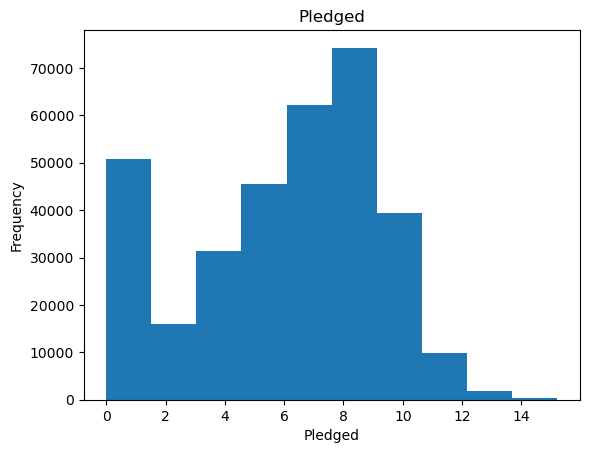

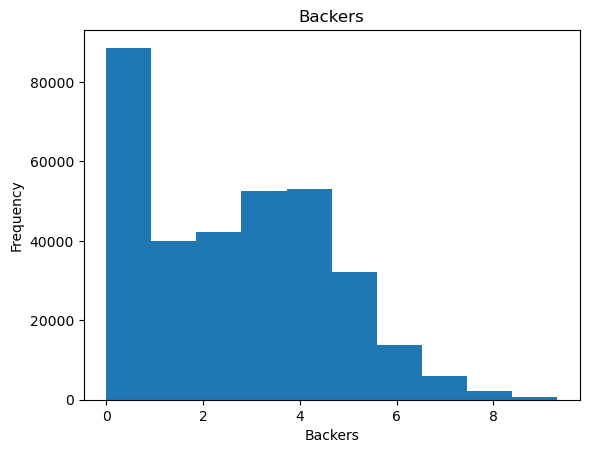

In [36]:
for column in ['Goal', 'Pledged', 'Backers']:
    histogram(working_df, column)
    


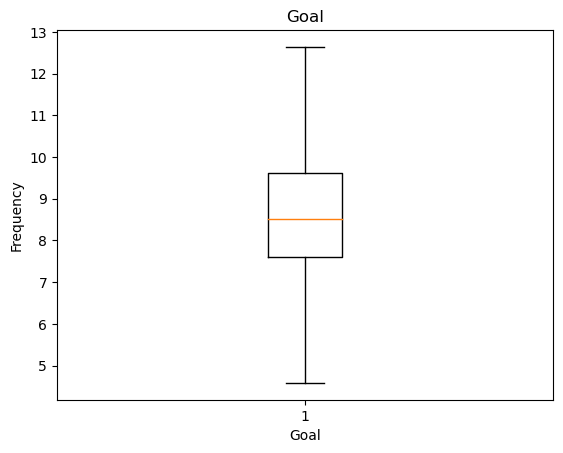

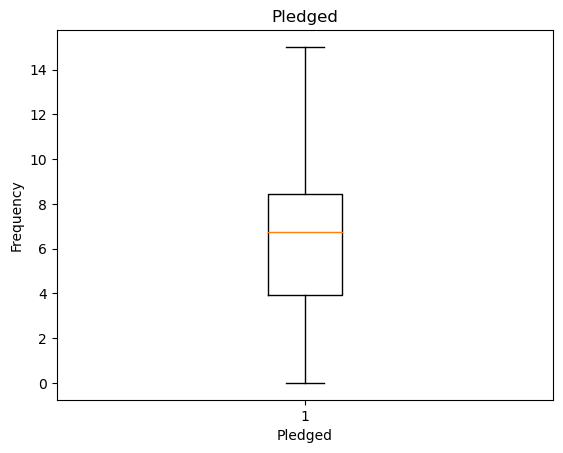

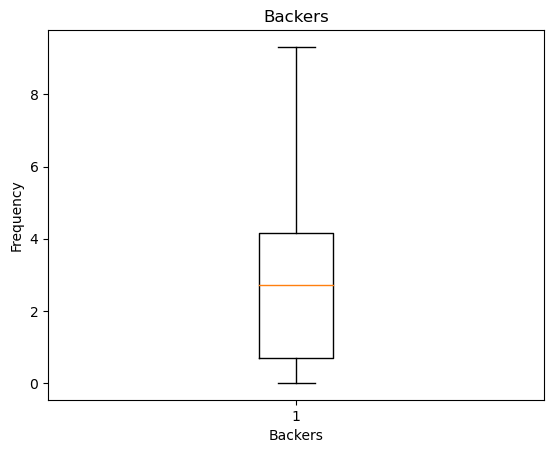

In [76]:
for col in ['Goal', 'Pledged', 'Backers']:
    boxplots(working_df, col)

Histograms and boxplots look much better. 